<a href="https://colab.research.google.com/github/a-bordbar/een_project3/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/a-bordbar/een_project3
!pwd
%cd "./een_project3"


Cloning into 'een_project3'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 13), reused 19 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 1.07 MiB | 8.04 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content
/content/een_project3


Image shape: (360, 643)


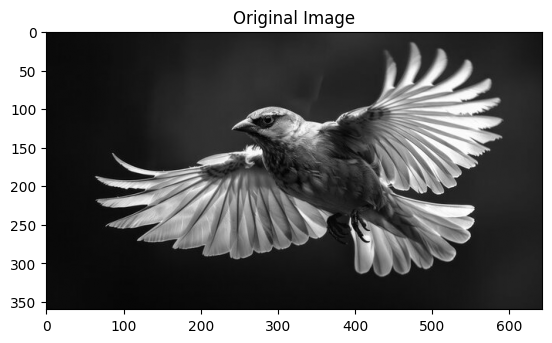

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from utils import *
from imageio.v2 import imread



img = imread("./image.jpg", pilmode='L')  # 'L' ensures grayscale
img = img.astype(float)

# Normalize to 0–1
img = img / 255.0

print("Image shape:", img.shape)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()








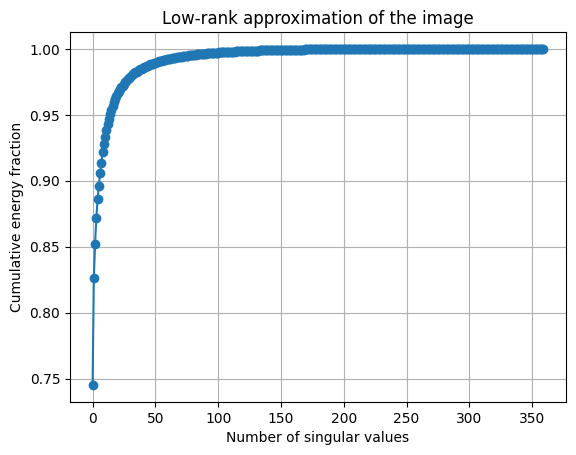

In [3]:
U, s, Vt = np.linalg.svd(img, full_matrices=False)
s_energy = s**2 / np.sum(s**2)
cumulative_energy = np.cumsum(s_energy)

import matplotlib.pyplot as plt
plt.plot(cumulative_energy, marker='o')
plt.xlabel("Number of singular values")
plt.ylabel("Cumulative energy fraction")
plt.title("Low-rank approximation of the image")
plt.grid(True)
plt.show()


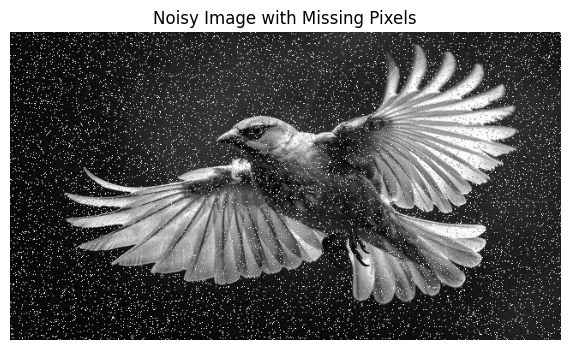

In [7]:
# Apply noise and introduce missing values
img_noisy, mask = add_noise_and_missing(img, missing_fraction=0.05, snr_db=20, random_state=42)

# Show result
plt.figure(figsize=(8,4))
plt.imshow(img_noisy, cmap='gray')
plt.title("Noisy Image with Missing Pixels")
plt.axis('off')
plt.show()

λ=0.0000, RMSE=0.3500
λ=1.1111, RMSE=0.0584
λ=2.2222, RMSE=0.0687
λ=3.3333, RMSE=0.0794
λ=4.4444, RMSE=0.0891
λ=5.5556, RMSE=0.0979
λ=6.6667, RMSE=0.1056
λ=7.7778, RMSE=0.1131
λ=8.8889, RMSE=0.1197
λ=10.0000, RMSE=0.1258

 Best λ = 1.1111111111111112 (RMSE=0.0584)


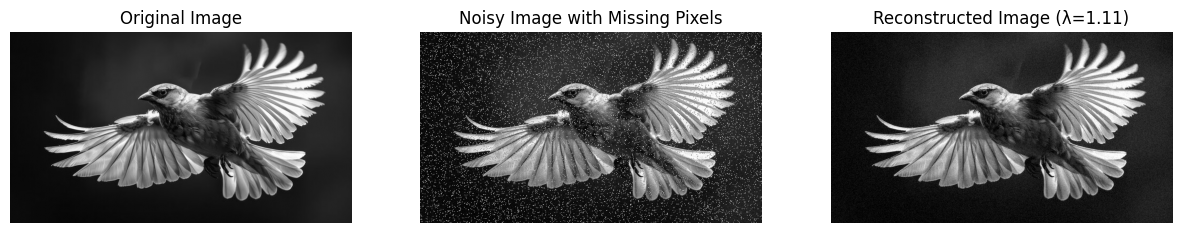

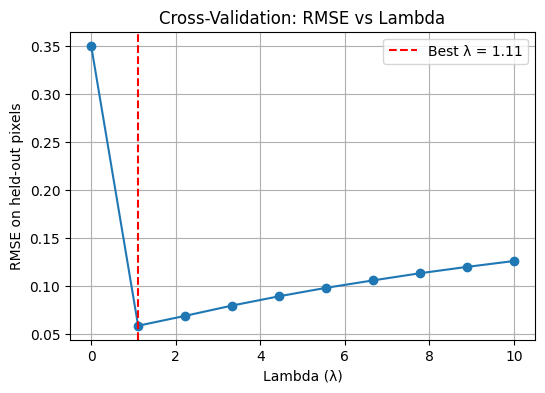

In [8]:
lambda_values = np.linspace(0,10, 10)

best_lambda, results = cross_validate_lambda(img_noisy, lambda_values)
lambdas = list(results.keys())
rmse_values = list(results.values())




# Now I use the best lambda to reconstruct the image
img_reconstructed = softImpute(img_noisy, reg=best_lambda, num_iterations=100, tolerance=1e-5)





plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_noisy, cmap='gray')
plt.title("Noisy Image with Missing Pixels")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_reconstructed, cmap='gray')
plt.title(f"Reconstructed Image (λ={best_lambda:.2f})")
plt.axis('off')

plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.axvline(best_lambda, color='r', linestyle='--', label=f"Best λ = {best_lambda:.2f}")
plt.xlabel("Lambda (λ)")
plt.ylabel("RMSE on held-out pixels")
plt.title("Cross-Validation: RMSE vs Lambda")
plt.grid(True)
plt.legend()
plt.show()

## The Effect of Rank  on Matrix Completion


From now on, I only generate matrices randomly with a certain rank, since I am more focused on plots than the visual representation. /Alireza

In [9]:
def generate_low_rank_matrix(m, n, rank, seed=None):  ## Should be moved to utils
    """
    Generate an m x n matrix of a given rank.

    Parameters:
        m (int): Number of rows
        n (int): Number of columns
        rank (int): Desired rank (<= min(m, n))
        seed (int, optional): Random seed for reproducibility

    Returns:
        X (np.ndarray): Low-rank matrix
    """
    if seed is not None:
        np.random.seed(seed)

    if rank > min(m, n):
        raise ValueError("Rank cannot be larger than min(m, n)")

    A = np.random.randn(m, rank)
    B = np.random.randn(rank, n)
    X = A @ B
    return X

Rank = 1 Max Rank = 360
λ=0.0000, RMSE=0.0028
λ=1.1111, RMSE=0.0028
λ=2.2222, RMSE=0.0028
λ=3.3333, RMSE=0.0028
λ=4.4444, RMSE=0.0028
λ=5.5556, RMSE=0.0028
λ=6.6667, RMSE=0.0028
λ=7.7778, RMSE=0.0028
λ=8.8889, RMSE=0.0028
λ=10.0000, RMSE=0.0028

 Best λ = 0.0 (RMSE=0.0028)
Rank = 21 Max Rank = 360
λ=0.0000, RMSE=0.0135
λ=1.1111, RMSE=0.0114
λ=2.2222, RMSE=0.0123
λ=3.3333, RMSE=0.0135
λ=4.4444, RMSE=0.0135
λ=5.5556, RMSE=0.0135
λ=6.6667, RMSE=0.0135
λ=7.7778, RMSE=0.0135
λ=8.8889, RMSE=0.0135
λ=10.0000, RMSE=0.0135

 Best λ = 1.1111111111111112 (RMSE=0.0114)
Rank = 41 Max Rank = 360
λ=0.0000, RMSE=0.0188
λ=1.1111, RMSE=0.0157
λ=2.2222, RMSE=0.0164
λ=3.3333, RMSE=0.0175
λ=4.4444, RMSE=0.0188
λ=5.5556, RMSE=0.0188
λ=6.6667, RMSE=0.0188
λ=7.7778, RMSE=0.0188
λ=8.8889, RMSE=0.0188
λ=10.0000, RMSE=0.0188

 Best λ = 1.1111111111111112 (RMSE=0.0157)
Rank = 61 Max Rank = 360
λ=0.0000, RMSE=0.0223
λ=1.1111, RMSE=0.0184
λ=2.2222, RMSE=0.0191
λ=3.3333, RMSE=0.0200
λ=4.4444, RMSE=0.0212
λ=5.5556, R

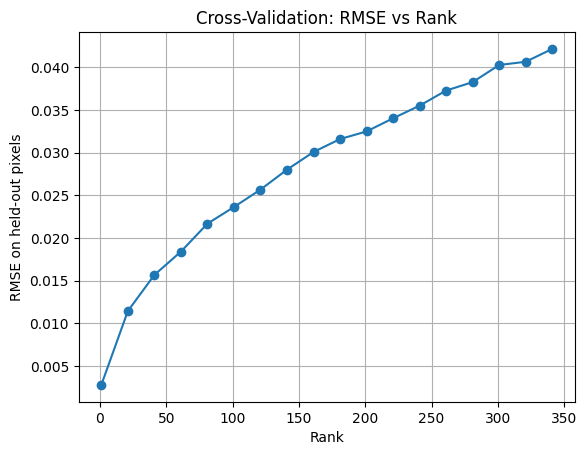

In [18]:
m,n = img.shape #create matrices of the size of the original image I had

rank_vals = np.arange(1, min(m,n), step = 20) #step 5 so that the computer does not explode
lambda_values = np.linspace(0,10, 10)
rmse_optimum = []
for rr in rank_vals:
    print("Rank = " +  str(rr) + " Max Rank = " + str(min(m,n)))
    X = generate_low_rank_matrix(m,n,rr, seed = None)
    X_noisy, _ = add_noise_and_missing(X, missing_fraction=0.05, snr_db=10, random_state=None)
    best_lambda, results = cross_validate_lambda(X_noisy, lambda_values)
    rmse_optimum.append(results[best_lambda])

plt.plot(rank_vals, rmse_optimum, marker='o')
plt.xlabel("Rank")
plt.ylabel("RMSE on held-out pixels")
plt.title("Cross-Validation: RMSE vs Rank")
plt.grid(True)
plt.show()


